In [1]:
import numpy as np
import matplotlib.pyplot as plt
from massspec import *
%matplotlib qt

C:\Users\krutilia\PHAROS Data\massspec.py:978: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if est_flight_t is 0:


In [2]:
exp = AnalyzeAcq("N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData")

In [3]:
exp

In [4]:
tof = AnalyzeAcq("N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData") 

In [5]:
tof

## Plotting multiple spectra in one figure
---

In [6]:
date = "2020-10-06"

In [7]:
date

'2020-10-06'

In [8]:
#ito = exp.load_data(date=date, 
                   #subset=list(range(1,13)))2,3,6,7,10,11

0 : 01.signal.div
1 : 02.signal.div
2 : 03.signal.div
3 : 04.signal.div
4 : 05.signal.div
5 : 06.signal.div
6 : 07.signal.div
7 : 08.signal.div
8 : 09.signal.div
9 : 10.signal.div
10 : 11.signal.div
11 : 12.signal.div


In [24]:
ito = exp.load_data(date=date, subset=[2,3,6,7,10,11]) #data set for pharos illumination 2020-10-06

0 : 02.signal.div
1 : 03.signal.div
2 : 06.signal.div
3 : 07.signal.div
4 : 10.signal.div
5 : 11.signal.div


In [25]:
ito

['N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\02.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\03.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\06.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\07.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\10.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\11.signal.div']

In [35]:
ito_h = []
for d in ito:
    ito_h.append(exp.read_header(d))
    
ito_t = []
for h in ito_h:
    ito_t.append(exp.time(h))
    
ito_voltages = []
for i in range(len(ito)):
    ito_voltages.append(exp.read_frames(ito[i], ito_h[i]))
    
ito_mz, ito_v = [], []

ito_params = [16000, 14500, 0.004, 0.047, 1.07]

for i in range(len(ito)):
    o = exp.m2z(ito_t[i], ito_voltages[i], ito_params)
    ito_mz.append(o[0])
    ito_v.append(o[1])

In [36]:
#ito = exp.load_data(date=date, 
                    #subset=list(range(4,8)))

Everything so far should be familiar from the first tutorial. We have to use the function `plot_spectra` to plot multiple spectra in one figure. First, check its arguments:

We already have the following arguments: `headers` (ito_h), `mz` (ito_mz), and `voltages` (ito_v).

In [37]:
substrate = "indium tin oxide"
substrate = "silicon 0.1-1 \u03A9·$cm^{-1}$" #centered point alt+0183

# note that the text between the dollar signs will be written in LaTeX
sample = "100 $\mu$M bradykinin in pure water, 170 nl" 

pulse_E_dict = tof.get_pulse_energies(date=date, 
                                      wavelength='D1',
                                      nd='None')

# recall that get_pulse_energies outputs a dictionary; since we're only interested in the energies in Joules, 
# we have to extract the values and put them in a list
pulse_E = list(pulse_E_dict.values())
print(pulse_E)

# plotprops is shorthand for plot properties
plotprops = {
    "offset" : 0.5, # the space between each spectra
    "figsize" : (15,10),
    "title" : f"$\lambda$=1026 nm and 513 nm, 190 fs, {sample} on {substrate}, front illumination",
    "xlabel" : 'mass-to-charge [m/z]'#mass-to-charge [m/z]Time [$\mu$s]
}

[' 6.5 $\\mu$J', '16.8 $\\mu$J', '6.5 $\\mu$J', '16.8 $\\mu$J', '6.5 $\\mu$J', '16.8 $\\mu$J', '6.5 $\\mu$J', '16.8 $\\mu$J', '6.5 $\\mu$J', '16.8 $\\mu$J', '6.5 $\\mu$J', '16.8 $\\mu$J']


In [32]:
times_ex =[]
for i in range(len(ito_h)):
   times_ex.append(int((ito_h[i]['t'][0]-ito_h[0]['t'][0])/60))
times_ex

[0, 42, 79, 142, 236, 327]

In [33]:
#del pulse_E[-2]

In [19]:
#pulse_E.insert(5, '-')

In [38]:
pulse_E = [
 '16.8 $\\mu$J',

 '16.8 $\\mu$J',

 '16.8 $\\mu$J',

 '16.8 $\\mu$J',

 '16.8 $\\mu$J',

 '16.8 $\\mu$J']

Notice that `plot_spectra` uses the argument `labels` for the legend. It automatically extracts the number of shots from the headers.

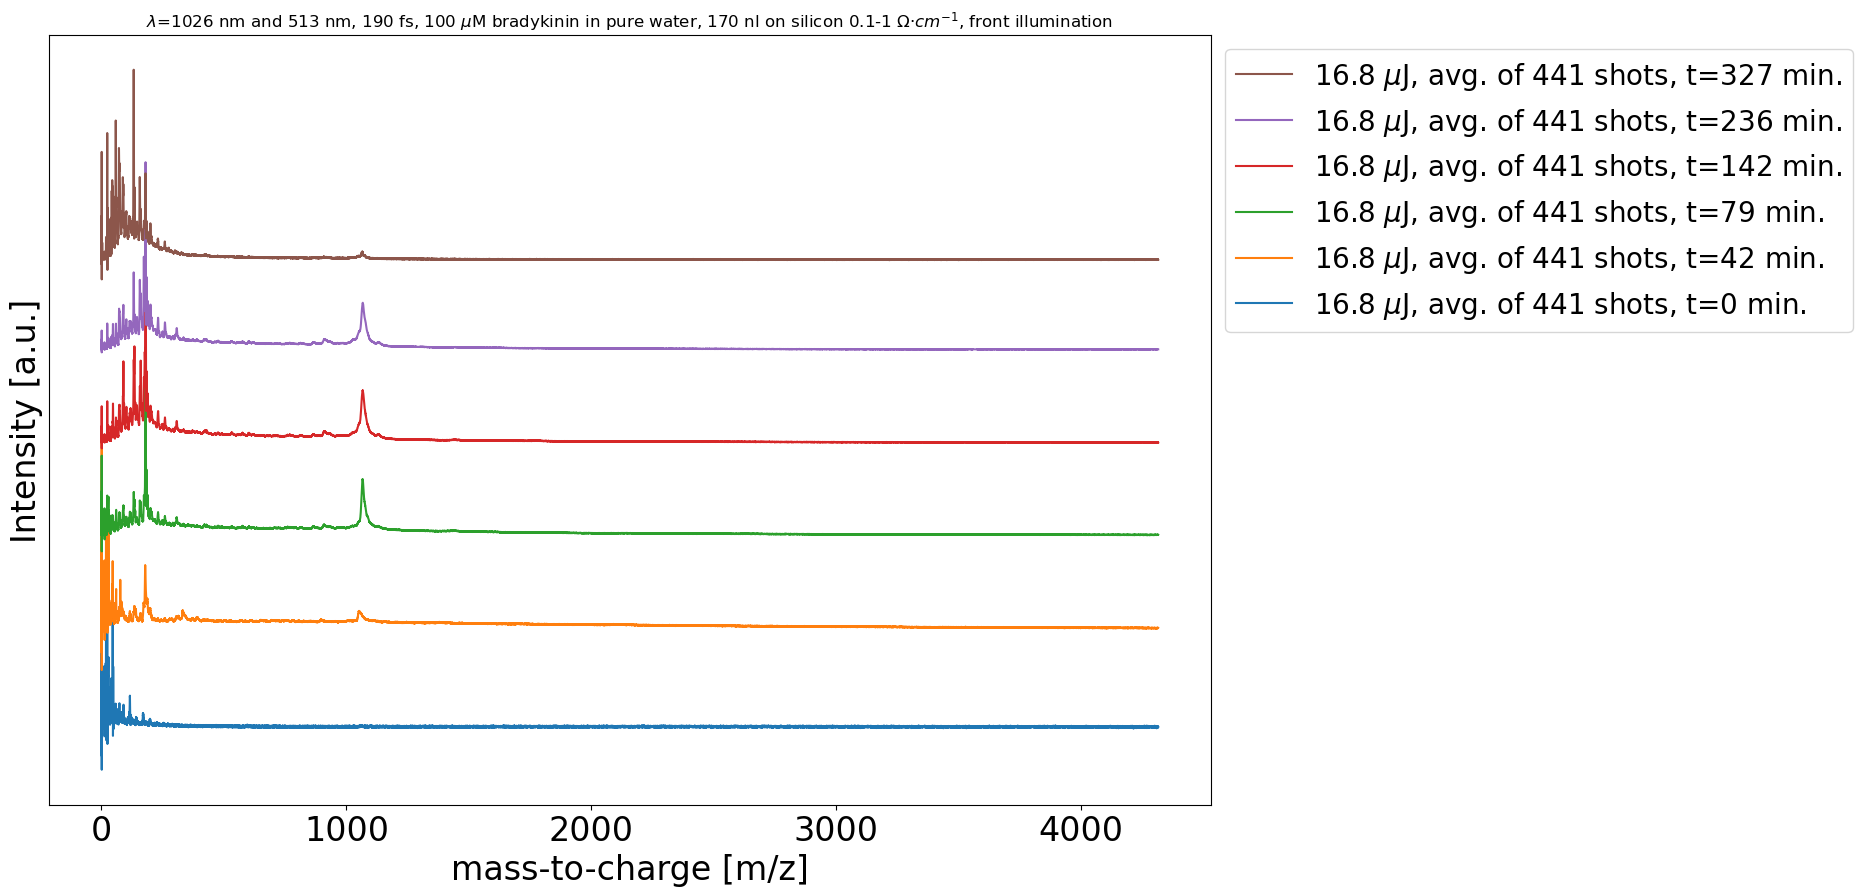

In [39]:
exp.plot_spectra(headers=ito_h, 
                 mz=ito_mz, 
                 voltages=ito_v, 
                 labels=pulse_E, 
                 plotprops=plotprops,
                 times=times_ex,
                 savefig='spectra.png')

In [43]:
exp.plot_spectra(headers=ito_h, 
                 mz=ito_mz, 
                 voltages=ito_v, 
                 labels=pulse_E, 
                 plotprops=plotprops,
                 times=times_ex,
                 savefig='spectra.png')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(reversed(handles),reversed(labels), fontsize=18)

If we want to zoom in, we must define the x- and y-limits in the `plotprops` argument. We must adjust the offset and account for it in the upper y-limit.

In [22]:
plotprops_zoom = {
    "offset" : 0.1,
    "figsize" : (15,10),
    "xlim" : (0, 1500),
    "ylim" : (-0.3, 0.16*12+0.2),
    "title" : f"$\lambda$=1026 nm, 190 fs, {sample} on {substrate}",
    "xlabel" : 'mass-to-charge [m/z]'#mass-to-charge [m/z]Time [$\mu$s]
}

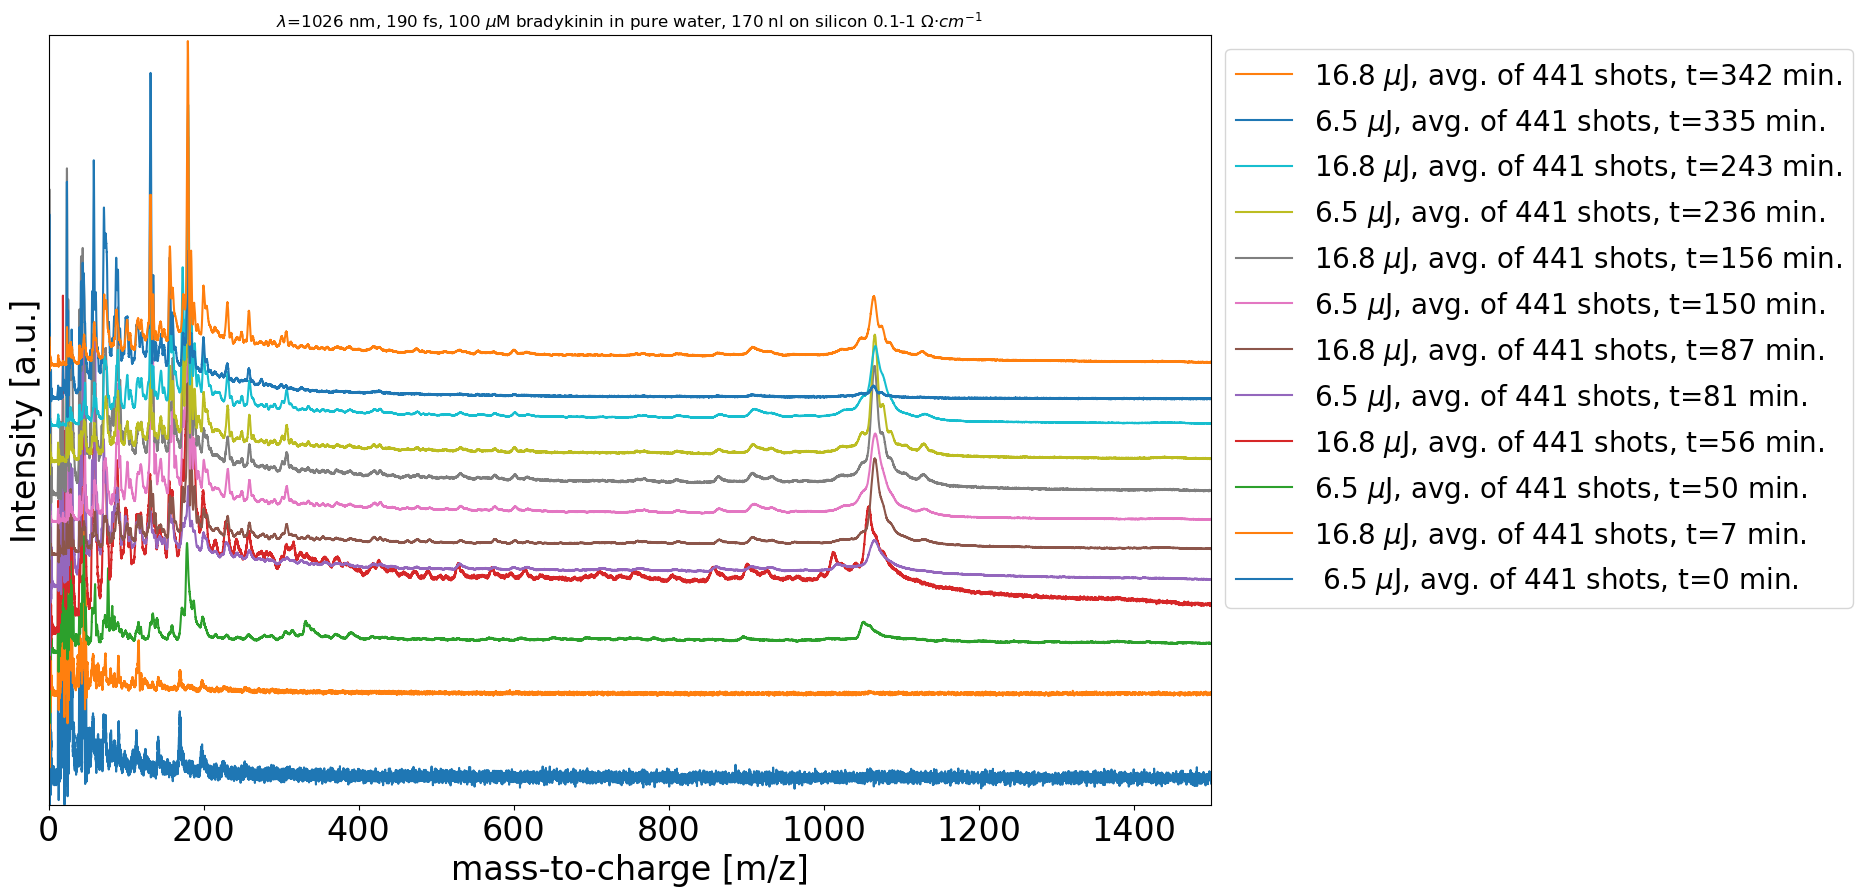

In [23]:
exp.plot_spectra(headers=ito_h, 
                 mz=ito_mz, 
                 voltages=ito_v, 
                 labels=pulse_E, 
                 plotprops=plotprops_zoom,
                 times=times_ex,
                 savefig='spectra.png',
                )

ZOOM for small mass ions